In [1]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')

In [3]:
dataset_train.shape

(1258, 6)

In [4]:
dataset_train.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"


In [5]:
training_set = dataset_train.iloc[:, 1:2].values

In [6]:
training_set

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [7]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [9]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [10]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [11]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
#from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import GRU

Using TensorFlow backend.


In [12]:
# Initialising the RNN
regressor = Sequential()

In [13]:
# Adding the first GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [14]:
# Adding a second GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [15]:
# Adding a third GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [16]:
# Adding a fourth GRU layer and some Dropout regularisation
regressor.add(GRU(units = 50))
regressor.add(Dropout(0.2))

In [17]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [18]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
# Fitting the RNN
regressor.fit(X_train, y_train, batch_size=32, epochs=100)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0453
Epoch 2/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0058
Epoch 3/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0049
Epoch 4/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0051
Epoch 5/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0046
Epoch 6/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0043
Epoch 7/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 8/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 9/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0033
Epoch 10/100
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0037
Epoch 11/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0037
Epoch 12/100
1198/1198 [==

1198/1198 [==============================] - 3s 2ms/step - loss: 0.0013
Epoch 95/100
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 96/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0014
Epoch 97/100
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0015
Epoch 98/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 99/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013
Epoch 100/100
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0013


In [20]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
dataset_test.head(3)

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"


In [22]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

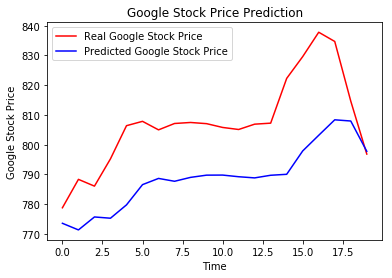

In [23]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()